In [1]:
import pandas as pd

mp_pdf = False
from scipy.stats import hypergeom

if mp_pdf:
    extension = "pdf"
    import matplotlib
    matplotlib.use('pgf')
    pgf_with_latex = {
        "text.usetex": True,            # use LaTeX to write all text
        "pgf.rcfonts": False,           # Ignore Matplotlibrc
        "text.latex.unicode": True,
        "pgf.preamble": [
            #r"\usepackage[utf8x]{inputenc}",
            r"\usepackage{xcolor}"
        ],
        "pgf.texsystem" : "xelatex",
        "figure.figsize": [12,7]
    }
    matplotlib.rcParams.update(pgf_with_latex)
else:
    extension = "png"
    
import matplotlib as mpl

dsize = 7.0866142
mpl.rcParams['font.size'] = 7

import matplotlib.pyplot as plt
import matplotlib
import random
import math




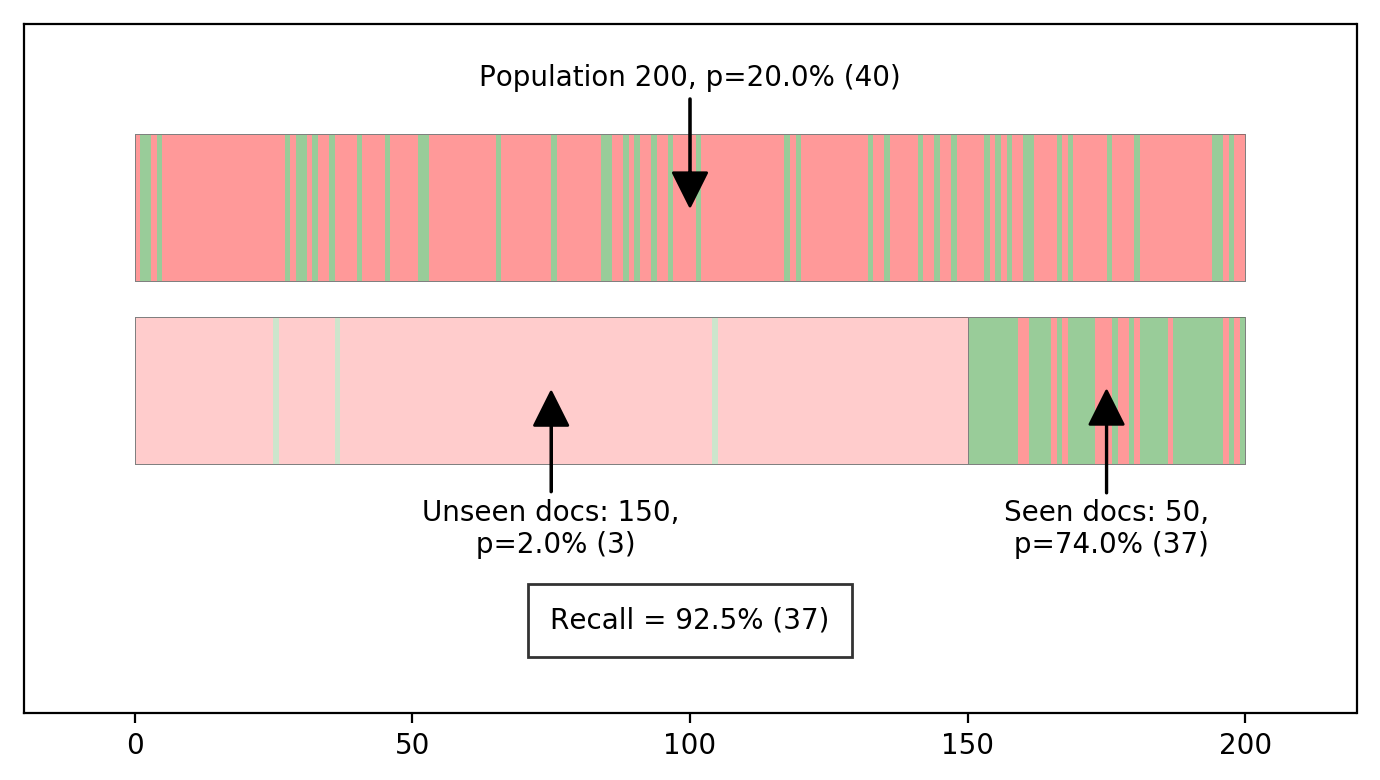

In [2]:



def rbars(n,p,ax,y,a,left=0):
    l = list(range(n))
    r = random.sample(l, int(n*p))
    for i in l:
        if i in r:
            c = "green"
        else:
            c = "red"
        ax.barh(
            y,1,left=i+left,
            color = c,
            alpha=a
        )
        ax.barh(
            y,n, left=left,
            color="None",
            edgecolor="grey",
            lw=0.2
        )
    return


p0 = 0.2 # Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 200 # Number of docs
n = 150 # Number of unseen docs


def calculate_proportions(p0, p1, n, N, ax):
    s = N - n # Number of seen docs
    p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

    recall = 1-p1/p0*n/N 
    
    p0n = round(n*p1)


    rbars(N,p0,ax,0,0.4)

    ax.annotate(
        f"Population {N}, p={p0:.1%} ({int(N*p0)})",(N/2,0),(N/2,0.66), ha="center", 
        arrowprops=dict(facecolor='black', shrink=0.01, width=0.2)
    )

    rbars(n, p1, ax, -1,0.2)

    ax.annotate(
        f"Unseen docs: {n},\n p={p1:.1%} ({int(n*p1)})",(n/2,-1),(n/2,-1.75), ha="center",va="center",
        arrowprops=dict(facecolor='black', shrink=0.01, width=0.2)
    )

    rbars(s, p2, ax, -1, 0.4, n)

    ax.annotate(
        f"Seen docs: {s},\n p={p2:.1%} ({int(s*p2)})",(s/2+n,-1),(s/2+n,-1.75), ha="center",va="center",
        arrowprops=dict(facecolor='black', width=0.2)
    )

    ax.text(N/2,-2.25, f"Recall = {recall:.1%} ({int(N*p0*recall)})",ha="center",va="center",
           bbox={"facecolor":"None",'alpha':0.8, 'pad':8}
           )

    #ax.barh(-1, n)

    plt.tick_params(
        axis='y',          
        which='both',     
        left=False,     
        right=False,       
        labelleft=False)

    plt.xlim(-N*0.1,N*1.1)
    plt.ylim(-2.75, 1)

    
fig, ax = plt.subplots(dpi=200,figsize=(7,4))


calculate_proportions(p0, p1, n, N, ax)


fig.tight_layout()

plt.savefig('images/proportions_1.png')

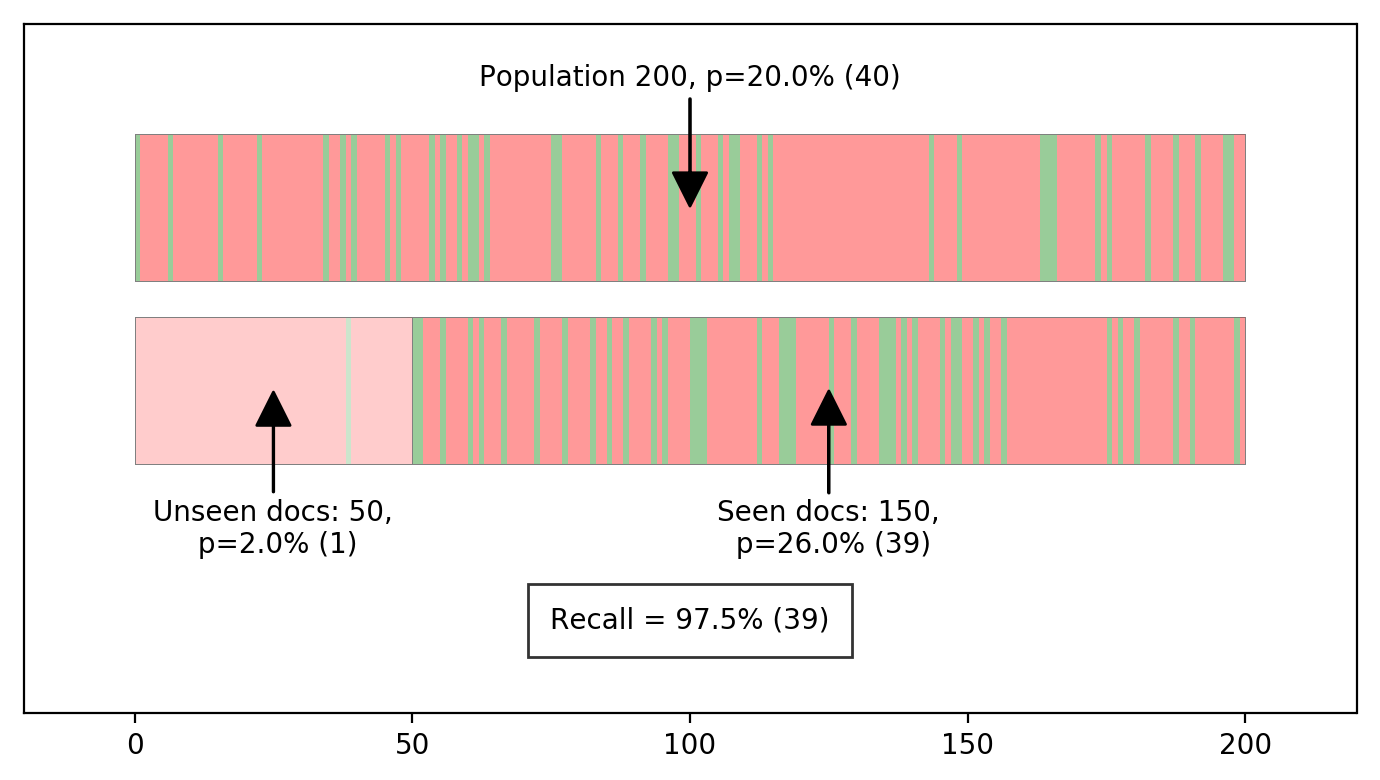

In [3]:
p0 = 0.2 #Proportion of relevant minstudies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 200 # Number of docs
n = 50 # Number of unseen docs

fig, ax = plt.subplots(dpi=200,figsize=(7,4))


calculate_proportions(p0, p1, n, N, ax)

fig.tight_layout()

plt.savefig('images/proportions_2.png')

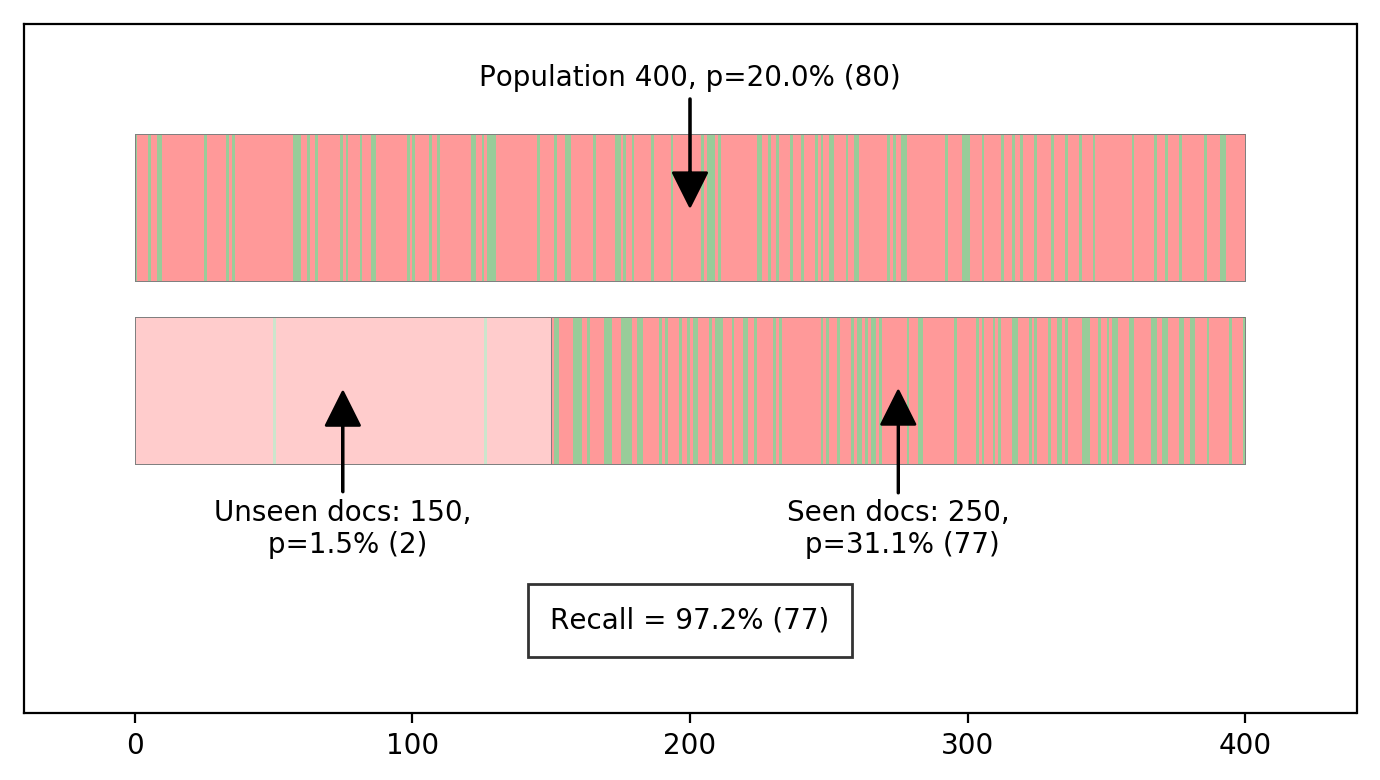

In [4]:
p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.015 # Proportion of relevant studies in the unseen docs

N = 400 # Number of docs
n = 150 # Number of unseen docs

fig, ax = plt.subplots(dpi=200,figsize=(7,4))

calculate_proportions(p0, p1, n, N, ax)


fig.tight_layout()
plt.savefig('images/proportions_3.png')

In [5]:
import scipy.stats as st
import numpy as np

X = 1
n = 150

p = X/n




def ci_ac(X, n, a):
    def get_k(a):
        a = (1-(1-a)/2)
        return st.norm.ppf(a)

    k = get_k(a)

    X_tilde = X + k**2/2
    n_tilde = n + k**2
    p_tilde = X_tilde / n_tilde
    q_tilde = 1-p_tilde

    ci = k* np.sqrt(p_tilde*q_tilde/n_tilde) 

    return p_tilde, ci

p_tilde, ci = ci_ac(X, n, 0.95)
print(f'p = {p}')

#print(X)
#print(X_tilde)
#print(n_tilde)

print(f'p_tilde = {p_tilde} +- {ci}')

#print(ci)

p = 0.006666666666666667
p_tilde = 0.01898532055491779 +- 0.021565429718406314


There is a < 50% chance that r < 0.33%
There is a < 33% chance that r < 0.66%
There is a < 10% chance that r < 1.96%
There is a < 5% chance that r < 2.59%


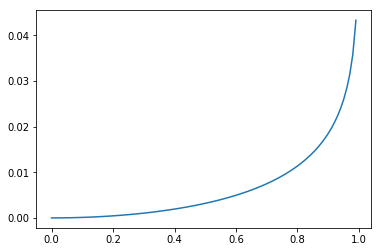

In [6]:
alphas = [x*0.01 for x in range(100)]
ys = [ci_ac(0,100,x)[1] for x in alphas]

thresh = [[0.5,False],[0.6666,False],[0.9,False],[0.95,False]]
for a,x in zip(alphas,ys):
    for t in thresh:
        if a>t[0] and t[1]==False:
            print(f"There is a < {1-t[0]:.0%} chance that r < {x:.2%}")
            t[1] = True
    
plt.plot(alphas,ys)

In [7]:
alphas = [x*0.01 for x in range(100)]
ys = [ci_ac(0,100,x)[1] for x in a]


TypeError: 'float' object is not iterable

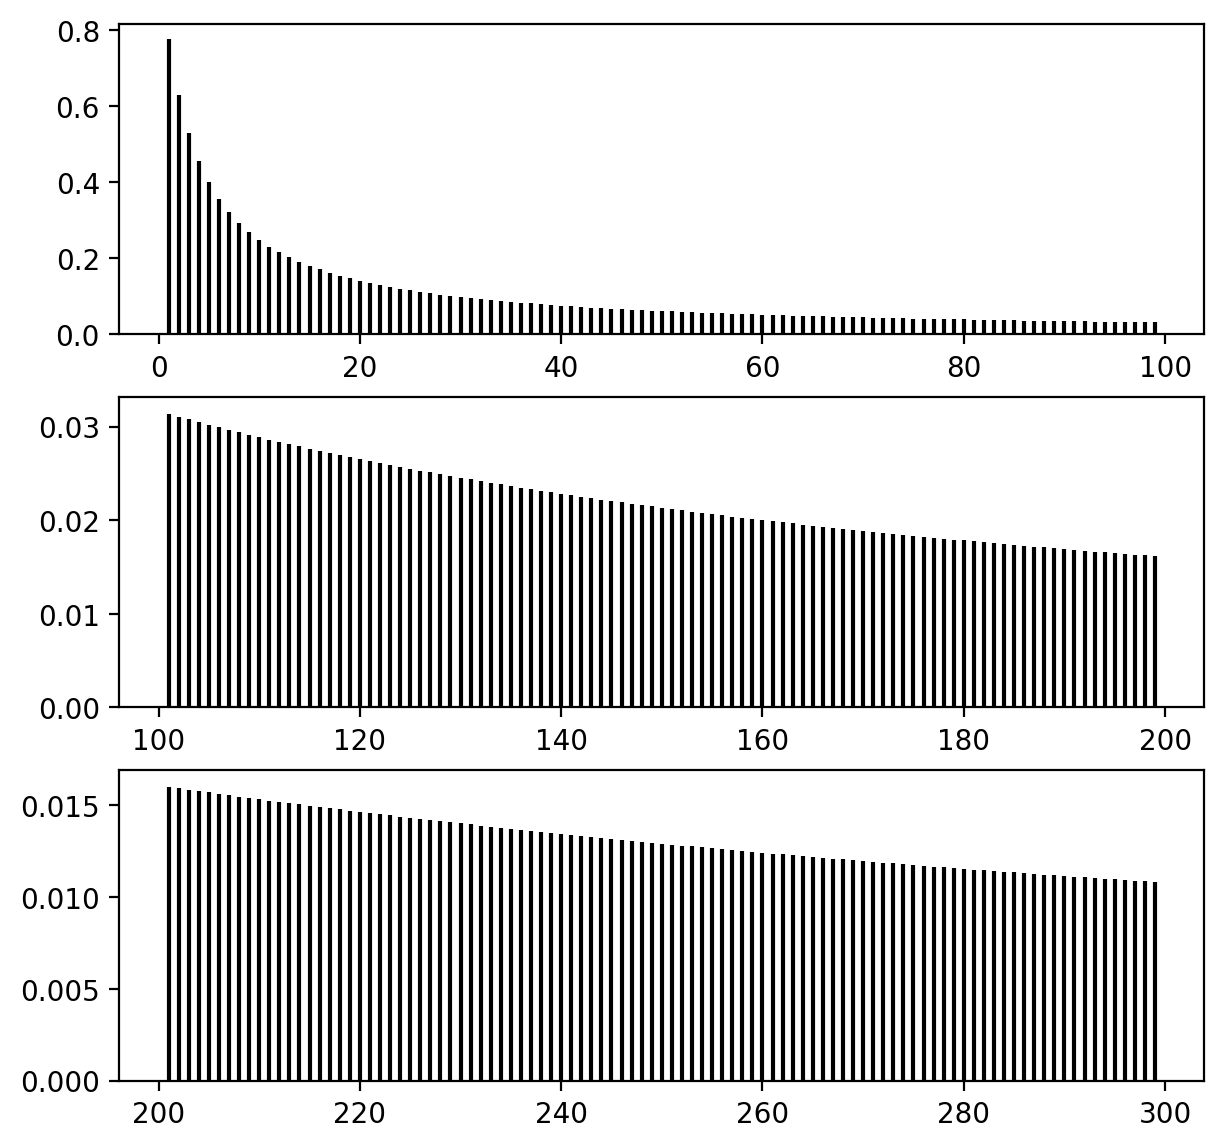

In [8]:
X = 0
fig, axs = plt.subplots(3,figsize=(7,7),dpi=200)

for i in [0,1,2]:
    for n in range((i*100)+1,(i+1)*100):
        ax = axs[i]
        p_tilde, ci = ci_ac(X, n, 0.90)
        ax.errorbar(n, p_tilde, ci, color="black")
        ax.set_ylim(0)

    

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


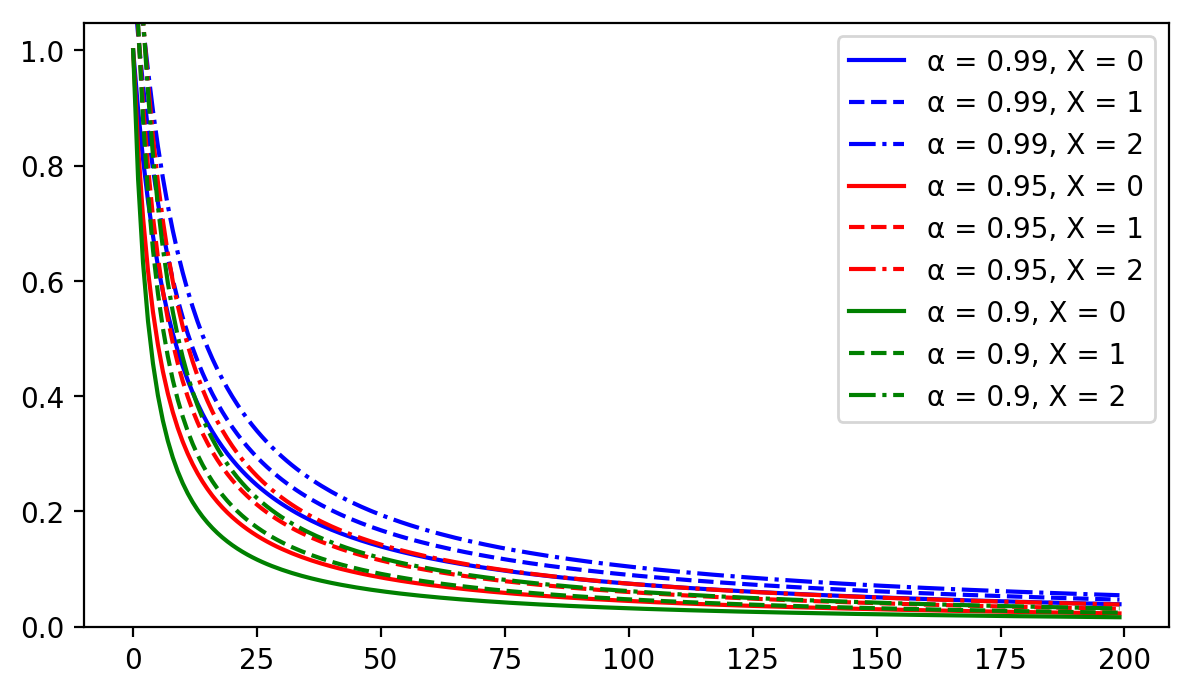

In [9]:
X = 1
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green"
}
lmap = {
    0: "-",
    1: "--",
    2: "-."
}

for a in [0.99,0.95,0.9]:
    for X in [0,1,2]:
        max_values = [x[0] + x[1] for x in [ci_ac(X, n, a) for n in range(200)]]
        ax.plot(max_values, label=f"{chr(945)} = {a}, X = {X}",c=cmap[a],linestyle=lmap[X])
        ax.set_ylim(0)
        
ax.legend()

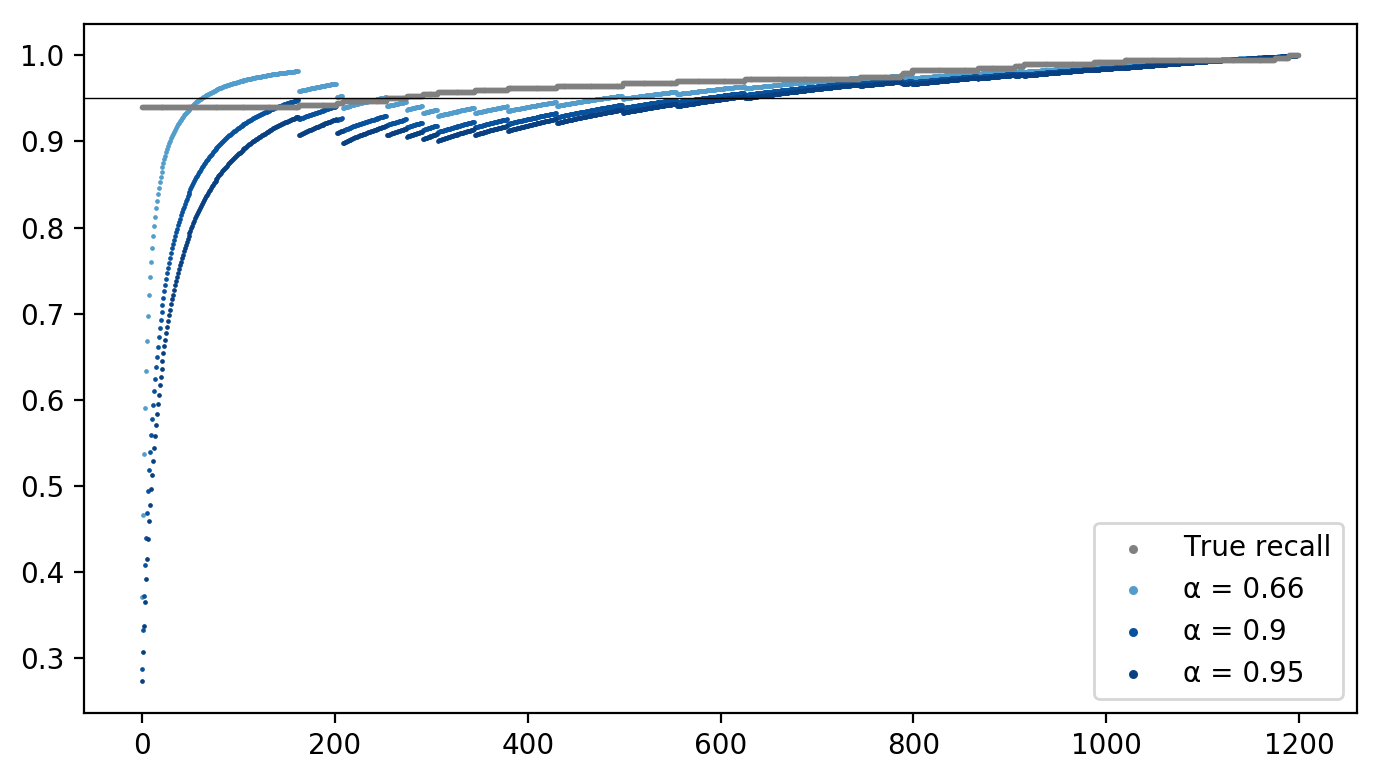

In [10]:
fig, ax = plt.subplots(figsize=(7,4),dpi=200)

p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 2000 # Number of docs
n = 1200 # Number of unseen docs

s = N - n # Number of seen docs
p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

relevant_seen = s*p2


if n*p1 % 1 == 0:
    sample = [1]*int(n*p1) + [0]*int(n*(1-p1))
else:
    print("not real integer")

random.shuffle(sample)

def estimate_total_recall(p_tilde, n, n_remaining, N, p0, p1, X):
    s = N - n_remaining # Number of seen docs
    
    relevant_n = N*p0 # Total number of relevant documents
    relevant_unseen = n*p1 # Number of documents in the original unseen set that were relevant
    relevant_seen = relevant_n - relevant_unseen + X
    
    p2 = relevant_seen/s # proportion of relevant studies in seen docs
    
    p0_hat = (p_tilde*n_remaining + p2*s)/N  # estimated value of p for all doc    

    min_recall = 1-p_tilde/p0_hat*n_remaining/N 
    return min_recall, p2

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green",
    0.5: "black"
} 

cmap = plt.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1)

ax.scatter([],[], c = "grey",s=5, label="True recall")
r_docs = N*p0


for a in [0.66, 0.9, 0.95]:
    r_seen = relevant_seen
    r_seen_start = r_seen
    ax.scatter([],[],c=cmap(norm(a)),label=f"{chr(945)} = {a}",s=5)
    n_remaining = n
    X = 0
    ys = []
    xs = []
    rs = []
    r_seen_path = []
    lintervals = []
    uintervals = []
    for i,x in enumerate(sample):
        X += x
        r_seen += x
        n_remaining -= 1 # reduce number of unseen docs by one

        p_tilde, ci = ci_ac(X, i+1, a)
        max_value = p_tilde+ci # Maximum (with ci) estimated value of p for unseen docs
        
        hypothetical_95 = math.ceil(r_seen / 0.95 + 0.01) - r_seen + X
        
        hyper_interval = hypergeom.interval(0.95, n, hypothetical_95, i+1)
        lintervals.append(r_seen_start+hyper_interval[0])
        uintervals.append(r_seen_start+hyper_interval[1])
        r_seen_path.append(r_seen)
        
        min_recall, p2 = estimate_total_recall(max_value, n, n_remaining, N, p0, p1, X)
        
        recall = (relevant_seen+X)/(N*p0)
        

        rs.append(recall)
        ys.append(min_recall)
        xs.append(i)
    ax.scatter(xs, ys, c=cmap(norm(a)), s=0.5)
ax.scatter(xs, rs,c="grey",s=1)
    
ax.axhline(0.95,lw=0.5,c="black")
    
ax.legend()
fig.tight_layout()
plt.savefig('images/sample_recall.png')


In [11]:
hypergeom.interval(0.95, n_remaining, hypothetical_95, i+1)
print(n_remaining)
print(hypothetical_95)

0
46.0


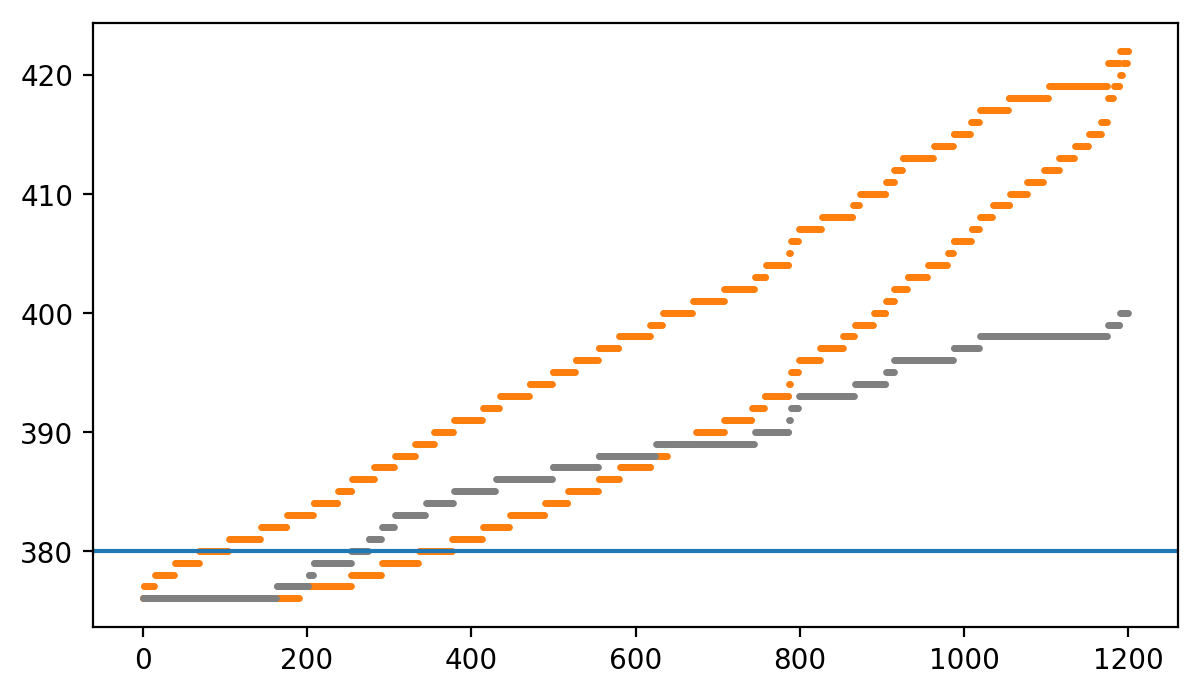

In [12]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

ax.scatter(xs, lintervals, s=2, c="C1")
ax.scatter(xs, uintervals, s=2, c="C1")
ax.scatter(xs, r_seen_path, s=2, c="grey")

ax.axhline(N*p0*0.95)



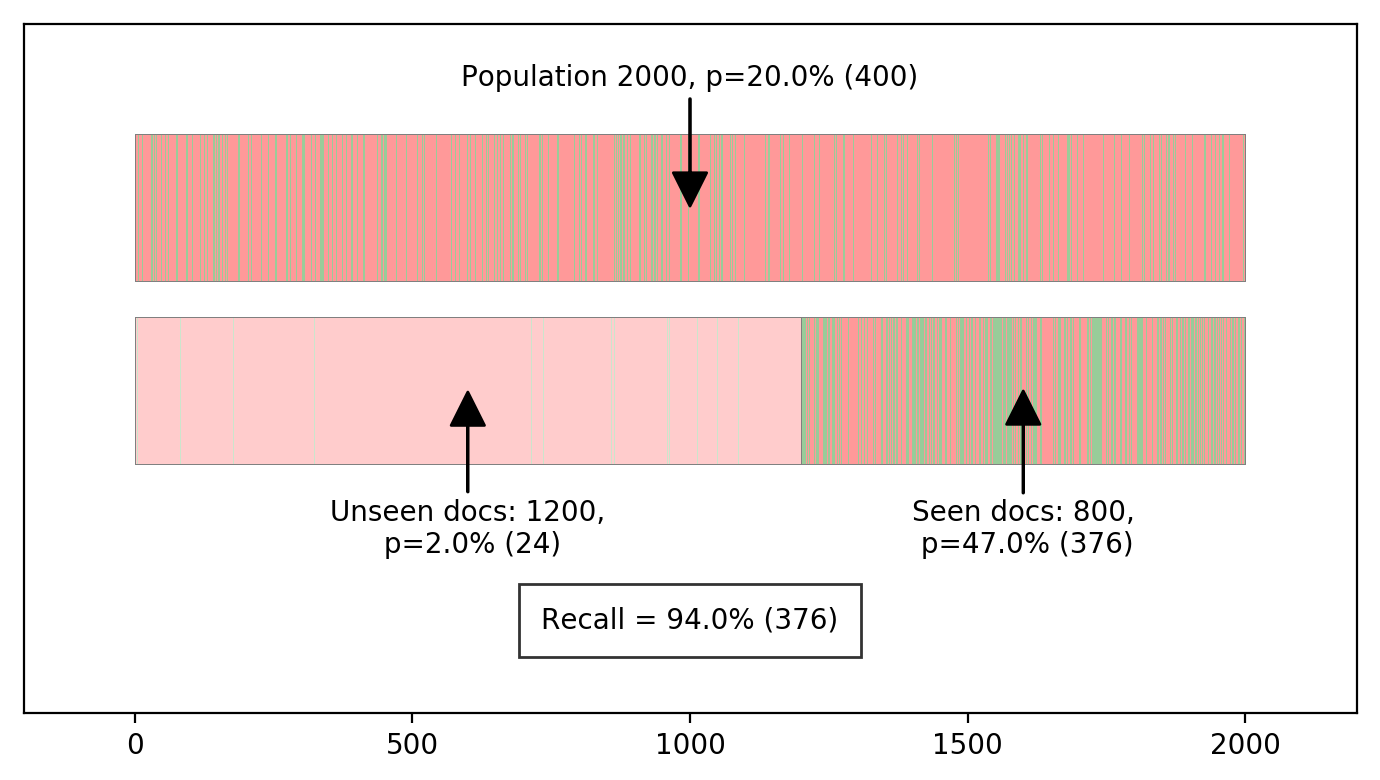

In [13]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))
calculate_proportions(p0, p1, n, N, ax)
fig.tight_layout()

plt.savefig('images/sample_status.png')

In [14]:
p_tilde, ci = ci_ac(1, 100, 0.95)

print(f'p = {p}')
print(f'p_tilde = {p_tilde} +- {ci}')

print(p_tilde+ci)

p = 0.006666666666666667
p_tilde = 0.028126814121422983 +- 0.03180004776042731
0.05992686188185029


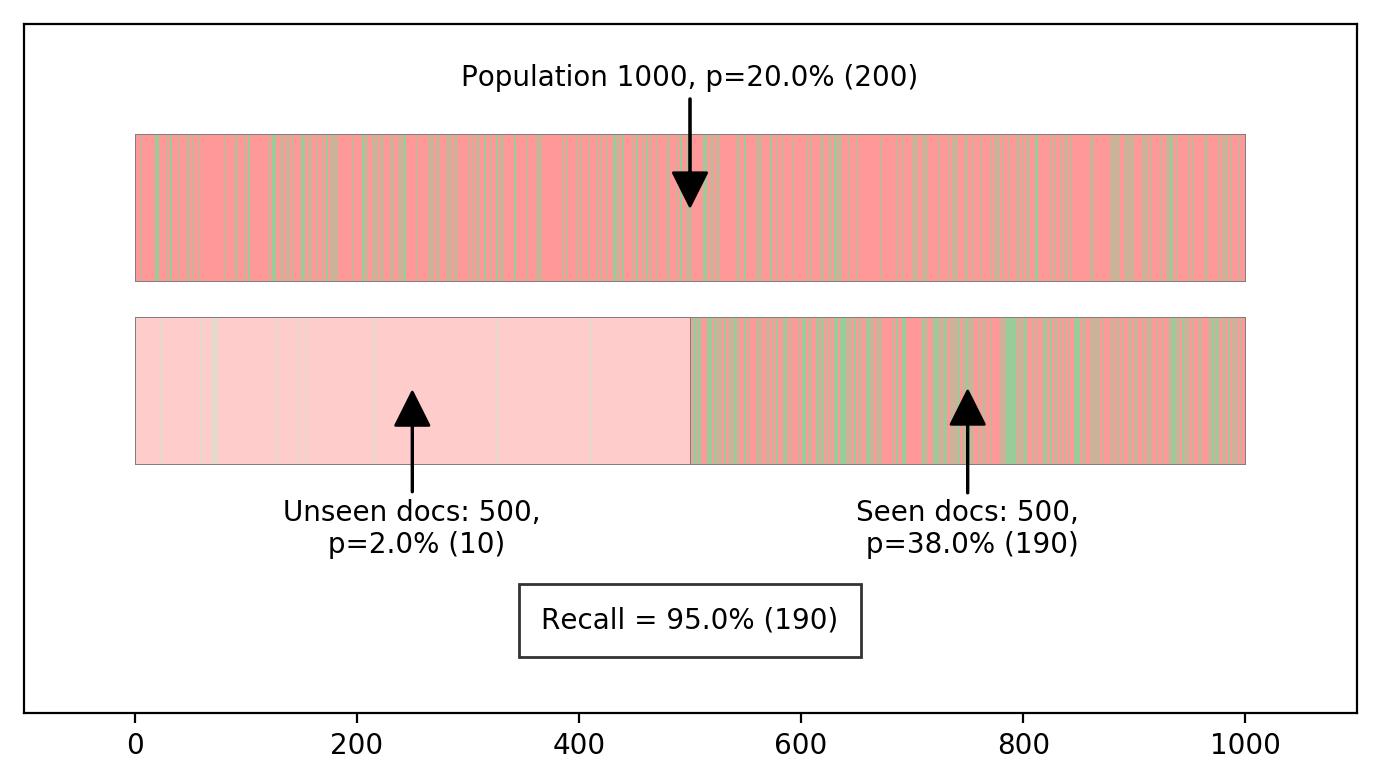

In [15]:
p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 1000 # Number of docs
n = 500 # Number of unseen docs

s = N - n # Number of seen docs
p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

relevant_seen = s*p2

fig, ax = plt.subplots(dpi=200,figsize=(7,4))
calculate_proportions(p0, p1, n, N, ax)
fig.tight_layout()

plt.savefig('images/sample_status_2.png')


In [ ]:
fig, axs = plt.subplots(2, dpi=200,figsize=(7,4))

if n*p1 % 1 == 0:
    sample = [1]*int(n*p1) + [0]*int(n*(1-p1))
else:
    print("not real integer")

cmap = {
    0.99: "blue",
    0.95: "red",
    0.9: "green",
    0.5: "black"
} 

cmap = plt.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1)

s = N - n # Number of seen docs
p2 = (N*p0-n*p1)/s # proportion of relevant studies in seen docs

relevant_seen = s*p2

a = 0.95

for j in range(200):
    random.shuffle(sample)
    r_seen = relevant_seen
    r_seen_start = r_seen
    n_remaining = n
    X = 0
    xs = []
    ys = []
    rs = []
    r_seen_path = []
    lintervals = []
    uintervals = []
    for i,x in enumerate(sample):
        X += x
        r_seen += x
        n_remaining -= 1 # reduce number of unseen docs by one

        p_tilde, ci = ci_ac(X, i+1, a)
        max_value = p_tilde+ci # Maximum (with ci) estimated value of p for unseen docs
        min_recall, p2 = estimate_total_recall(max_value, n, n_remaining, N, p0, p1, X)
        xs.append(i)
        ys.append(min_recall)
        
        recall = (relevant_seen+X)/(N*p0)
        rs.append(recall)
        
        
        hypothetical_95 = math.ceil(r_seen / 0.95 + 0.01) - r_seen + X
        
        hyper_interval = hypergeom.interval(0.95, n, hypothetical_95, i+1)
        lintervals.append(r_seen_start+hyper_interval[0])
        uintervals.append(r_seen_start+hyper_interval[1])
        r_seen_path.append(r_seen)
        
    ax = axs[0]
    ax.plot(xs, ys, lw=0.5, alpha=0.2, c=cmap(norm(a)))
    ax.plot(xs, rs,c="grey",lw=0.5,alpha=0.2)
    ax.axhline(0.95,lw=0.5,c="black")
    
    ax = axs[1]   
    ax.scatter(xs, lintervals, s=2, c="C1")
    ax.scatter(xs, uintervals, s=2, c="C1")
    ax.scatter(xs, r_seen_path, s=2, c="grey")

    ax.axhline(N*p0*0.95, lw=0.5, c="black")

    
    
fig.tight_layout()
plt.savefig('images/sample_recall_2.png')

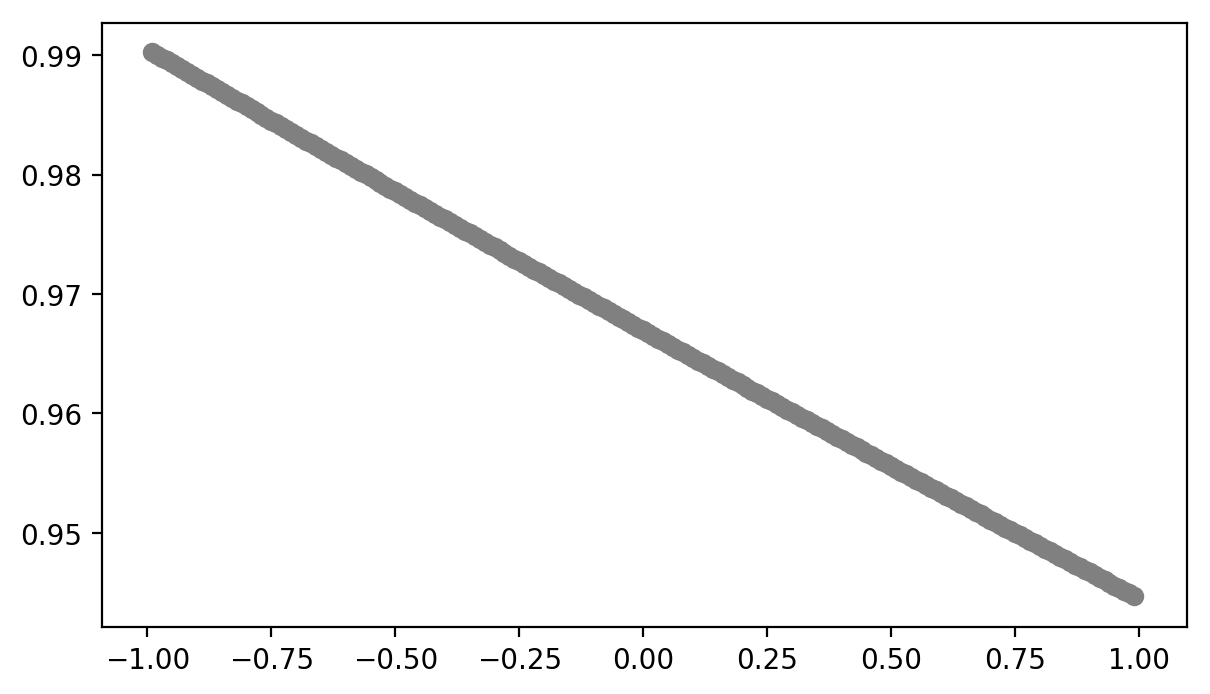

In [13]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

N = 1000 # Number of docs
n = 500 # Number of unseen docs

n_remaining = 100

X = 5

p_tilde, ci = ci_ac(X, n_remaining, 0.95)

for i in range(100):
    error = ci*i*0.01
    p_est = p_tilde - error
    
    recall_est, p2 = estimate_total_recall(p_est, n, n_remaining, N, p0, p1, X)
    #min_recall, p2 = estimate_total_recall(max_value, n, n_remaining, N, X)

    ax.scatter(i*-0.01, recall_est, c="grey")
    
for i in range(100):
    error = ci*i*0.01
    p_est = p_tilde + error
    
    recall_est, p2 = estimate_total_recall(p_est, n, n_remaining, N, p0, p1, X)
    #min_recall, p2 = estimate_total_recall(max_value, n, n_remaining, N, X)

    ax.scatter(i*0.01, recall_est, c="grey")
    
    

In [ ]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

p0 = 0.2 #Proportion of relevant studies in the whole population
p1 = 0.02 # Proportion of relevant studies in the unseen docs

iterations= 10

cmap = plt.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0, vmax=1000*iterations)

av_threshs = [] # the points when the threshold is reached
all_threshs = []
scaled_threshs = []
Ns = [] # the different values of n

Ns = [1000, 5000, 10000, 20000, 50000, 100000]

d = []

for p0 in [0.05, 0.1, 0.2]:
    for p1 in [0.01,0.02,0.05]:
        for k in range(iterations):
            N = 1000*(k+1)
            try:
                N = Ns[k]
            except:
                break
            n = N*p0*0.05/p1

            if n*p1 % 1 == 0:
                sample = [1]*int(n*p1) + [0]*int(n*(1-p1))
            else:
                print("not real integer")
                break

            threshs = []

            for j in range(20):
                random.shuffle(sample)
                n_remaining = n
                X = 0
                xs = []
                ys = []
                thresh_reached = False
                for i,x in enumerate(sample):
                    X += x
                    n_remaining -= 1 # reduce number of unseen docs by one
                    p_tilde, ci = ci_ac(X, i+1, a)
                    max_value = p_tilde+ci # Maximum (with ci) estimated value of p for unseen docs
                    min_recall, p2 = estimate_total_recall(max_value, n, n_remaining, N, p0, p1, X)


                    if thresh_reached == False and min_recall > 0.95:
                        threshs.append(i)
                        thresh_reached = True
                        d.append({
                            'scaled_thresh': i/N,
                            'N': N,
                            'p1': p1,
                            'p0': p0
                        })

                    xs.append(i)
                    ys.append(min_recall)

                ax.plot(xs, ys, alpha=0.3, c=cmap(norm(N)))


            av_threshs.append(np.mean(threshs))
            all_threshs.append(threshs)
            scaled_threshs.append([x/N for x in threshs])
    

    #Ns.append(N)

ax.axhline(0.95)

fig.tight_layout()

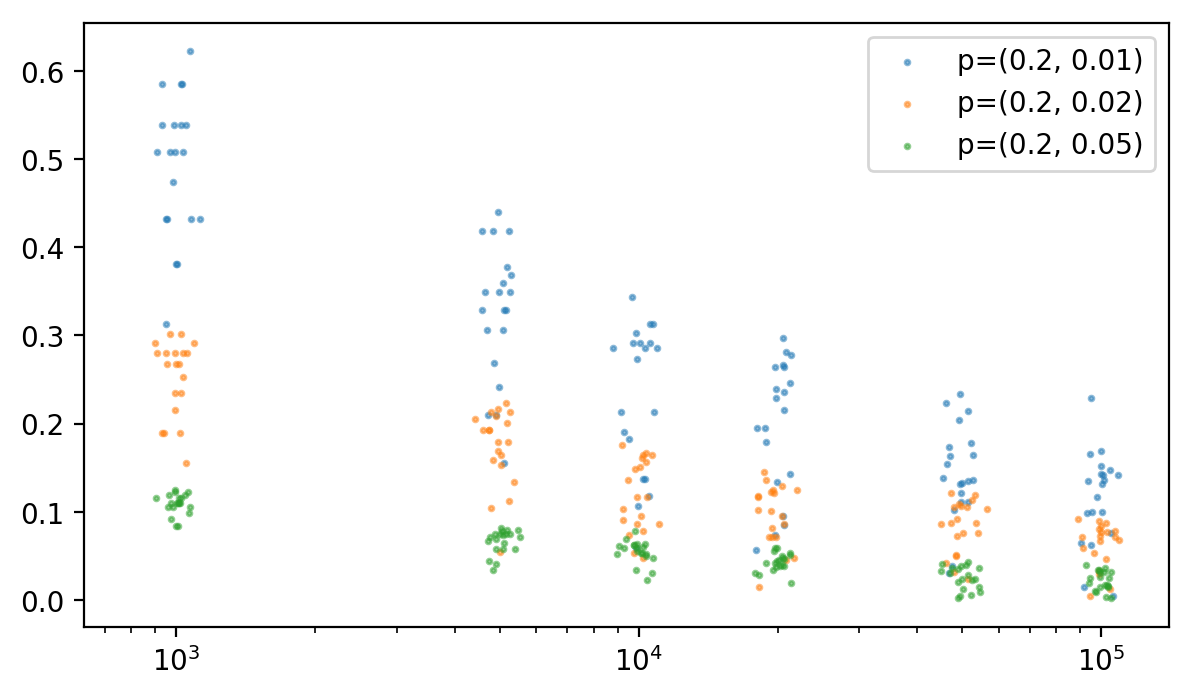

In [58]:
df = pd.DataFrame.from_dict(d)

df = df[df['N']>100]

fig, ax = plt.subplots(dpi=200,figsize=(7,4))


for name, group in df.groupby('p0'):
    for name2, group in group.groupby('p1'):
        xjitter = group['N'] * (1+(np.random.randn(len(group['N']))*0.05))
        ax.scatter(xjitter ,group['scaled_thresh'],label=f"p={name,name2}",s=3,alpha=0.5)

ax.set_xscale('log')
ax.legend()

plt.savefig('images/additional_burden.png')

In [59]:
df[df['p0']==0.1].head()

,N,p0,p1,scaled_thresh


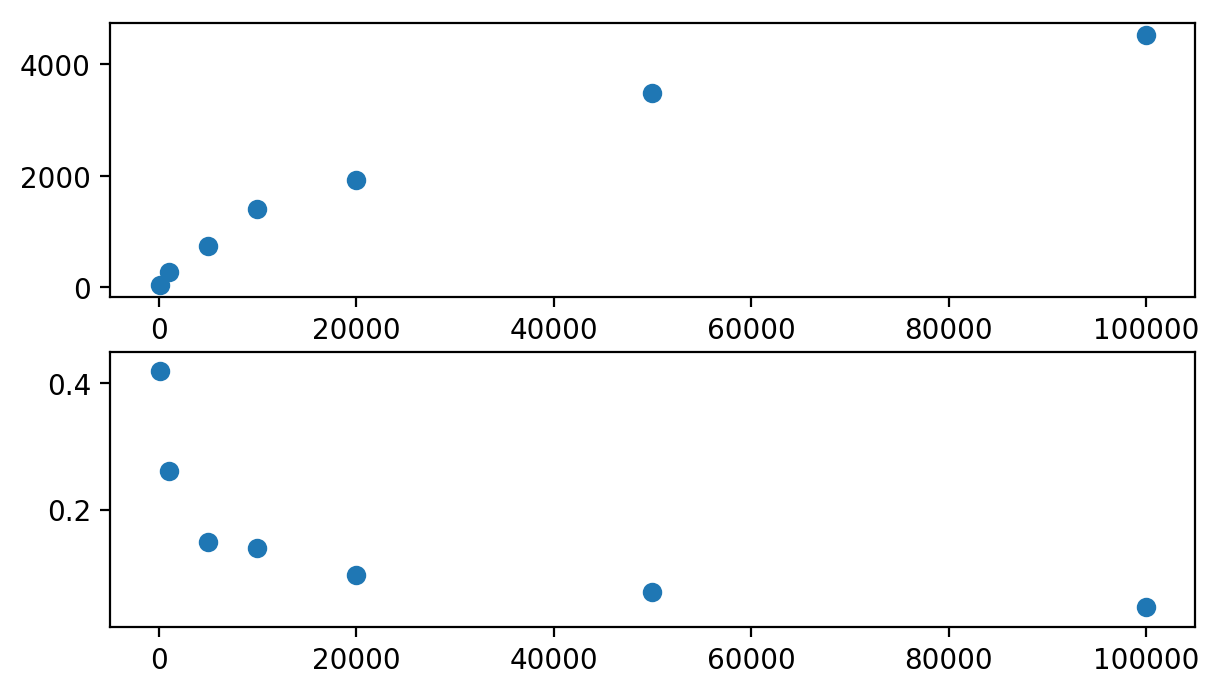

In [55]:
fig, axs = plt.subplots(2, dpi=200,figsize=(7,4))

ps = [t/n for n, t in zip(Ns, av_threshs)]

axs[0].scatter(Ns, av_threshs)

axs[1].scatter(Ns, ps)

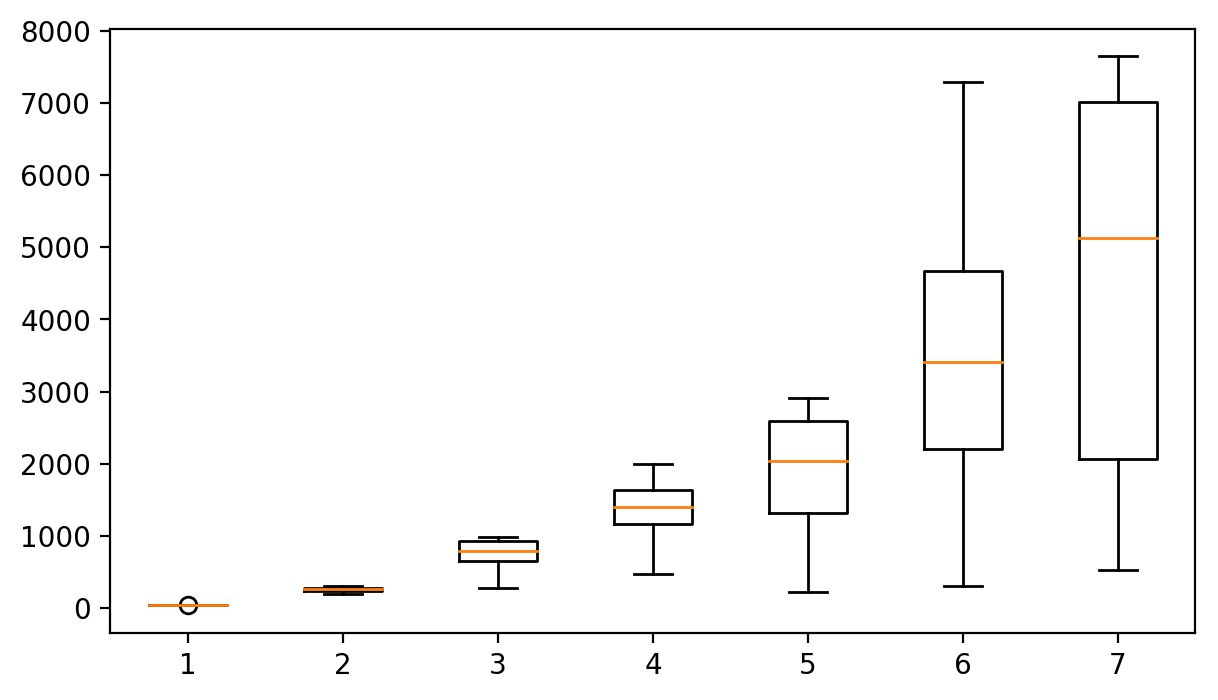

In [56]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

ax.boxplot(all_threshs)

plt.show()

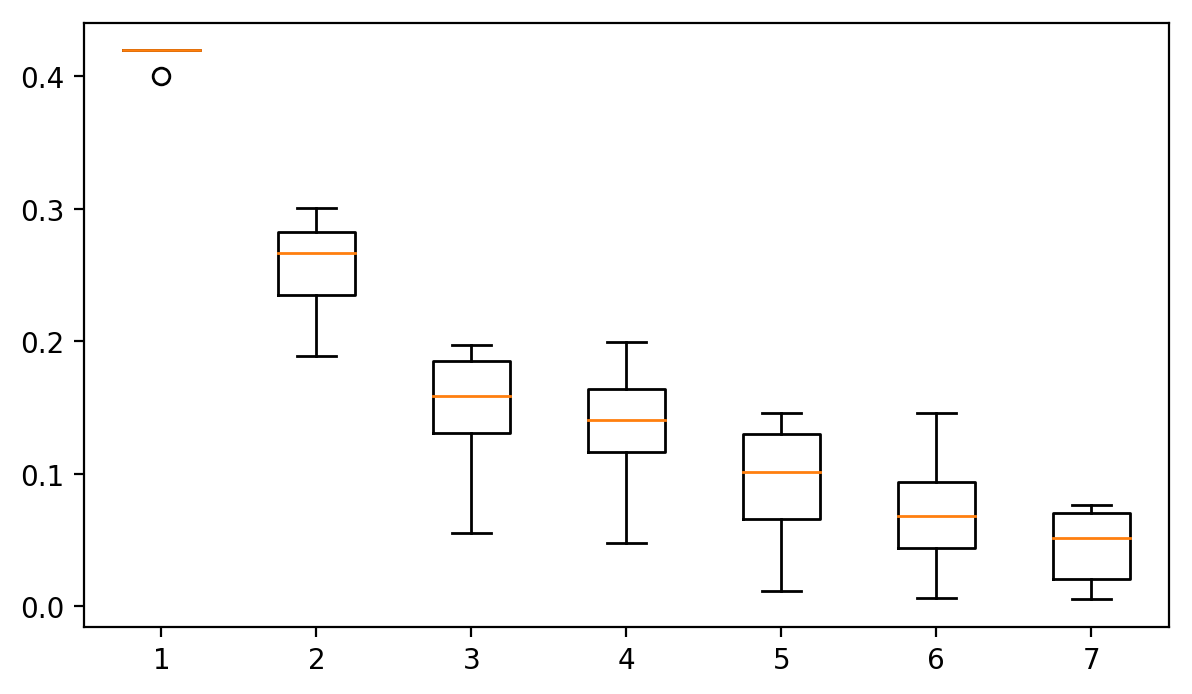

In [57]:
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

ax.boxplot(scaled_threshs)

plt.show()

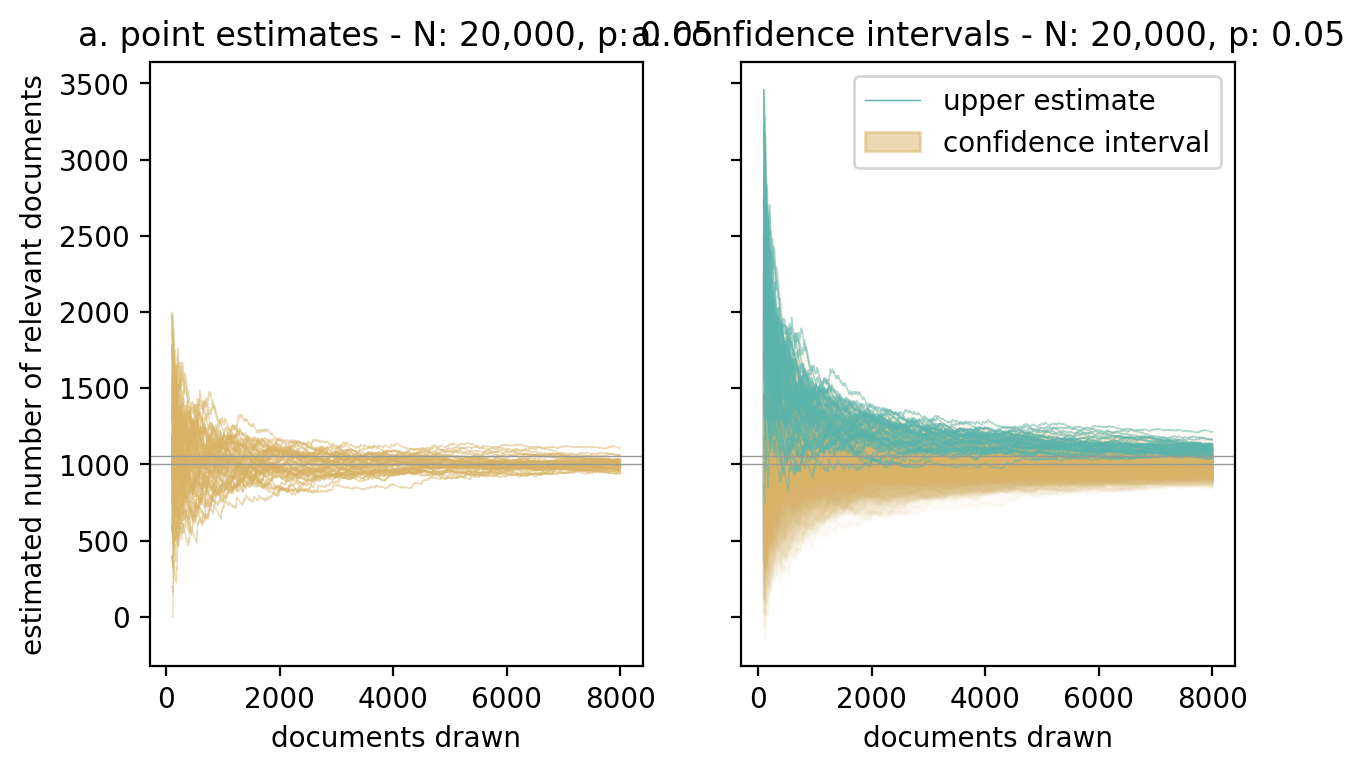

In [18]:
p = 0.05 # True recall#
N = 20000

n = N*0.4


sample = [1]*int(N*p) + [0]*int(N*(1-p))

fig, axs = plt.subplots(1,2,dpi=200,figsize=(7,4), sharey=True)

iterations = 50
alpha = 0.5

lw = 0.5

c1 = "#d8b365"
c2 = "#5ab4ac"
c3 = "#999999"

#min_estimate = 

ax = axs[1]

for j in range(iterations):

    random.shuffle(sample)

    X = 0

    ys = []
    y2s = []
    y3s = []
    xs = []
    for i,x in enumerate(sample[:int(n)]):
        X += x
        p_tilde, ci = ci_ac(X, i+1, 0.95)
        if i > 100:
            ys.append((p_tilde+ci)*N)
            y3s.append((p_tilde-ci)*N)
            y2s.append(X/i*N)
            xs.append(i)


    ax.plot(xs, ys, c=c2, lw=lw, alpha=alpha)
    ax.fill_between(xs, ys, y3s, color=c1, alpha=0.05)
    #ax.plot(xs,[y*0.9 for y in ys], c=c2,ls="--",lw=lw, alpha=alpha)
    
    axs[0].plot(xs, y2s, c=c1, lw=lw, alpha=alpha)



ax.fill_between([], [], [], color=c1, alpha=0.5, label="confidence interval")
ax.plot([], [], c=c2, lw=lw, label="upper estimate")

#ax.plot([], [], c=c2, lw=lw, ls="--", label="upper estimate: 95\% of studies")

axs[0].plot([], [], c=c1, lw=lw, label="estimate")

#ax.set_ylim(N*p*0.8,N*p*2)

axs[0].set_title(f"a. point estimates - N: {N:,}, p: {p}")
axs[1].set_title(f"a. confidence intervals - N: {N:,}, p: {p}")

axs[0].set_ylabel("estimated number of relevant documents")

for ax in axs:
    ax.axhline(N*p/0.95, lw=lw, c=c3)
    ax.axhline(N*p, lw=lw, c=c3)
    ax.set_xlabel("documents drawn")
    


    
plt.legend()

plt.savefig('images/bir_sampling.png', bbox_inches='tight')

plt.show()




In [42]:
def sample_size(N, pi, z, ME):
    return (N * ME**2 + z**2 * N * pi * (1-pi))/(N * ME**2 + pi * (1 -
pi) * z**2)

sample_size(804919, 0.001, 1.96, 0.0025)

614.5725105765376

In [48]:
bir = 0.000498
N = 804919
max_est = bir+0.0025*N

print(bir*N)

print(max_est)

400.84966199999997
2012.2979980000002


In [49]:
0.0025*N

2012.2975000000001

In [55]:
def appropriate_me(pi, N):
    est = pi*N
    max_err = est*0.05
    return max_err/N

ME_adj = appropriate_me(bir,N)
f"{ME_adj:f}"

'0.000025'

In [56]:
def sample_size(N, pi, z, ME):
    return (N * ME**2 + z**2 * N * pi * (1-pi))/(N * ME**2 + pi * (1 -
pi) * z**2)

sample_size(N, bir, 1.96, ME_adj)

638322.7069538007

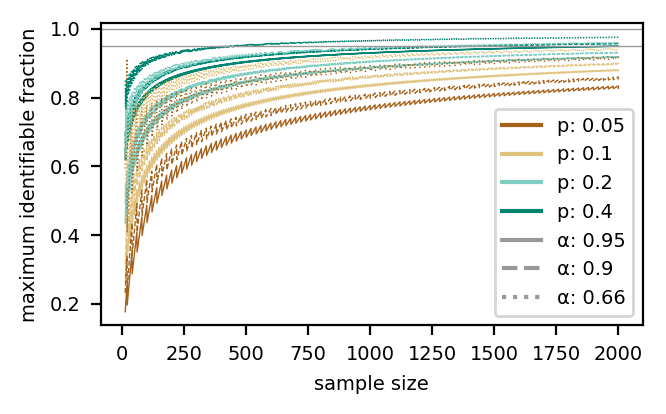

In [24]:
import math

N = 2000

ps = [0.05,0.1,0.2,0.4]
fig, ax = plt.subplots(dpi=200,figsize=(3.5,2))

linestyles = ["-","--",":"]
colours = ['#a6611a','#dfc27d','#80cdc1','#018571']

for a_i,a in enumerate([0.95,0.9,0.66]):
    for c_i,p in enumerate(ps):
        xs = []
        ys = []
        for i in range(N):
            if i > 10:
                X = math.floor((i+1)*p)
                p_tilde, ci = ci_ac(X, i+1, a)
                estimated_relevant = (p_tilde+ci)*N
                y = (N*p)/estimated_relevant
                ys.append(y)
                xs.append(i+1)
        ax.plot(xs,ys, ls = linestyles[a_i], c = colours[c_i], lw=lw)
        if a_i==0:
            ax.plot([],[], c = colours[c_i], label=f"p: {p}")
    ax.plot([],[], ls=linestyles[a_i], label=f"{chr(945)}: {a}",c=c3)
        
ax.axhline(1, lw=lw, c=c3)
ax.axhline(0.95, lw=lw, c=c3)

ax.set_ylabel("maximum identifiable fraction")
ax.set_xlabel("sample size")
ax.legend()    

plt.savefig('images/bir_variation.png')

In [ ]:

ys = []
xs = []
for i in range(500):
    if i > 50:
        p_tilde, ci = ci_ac(0, i+1, 0.9)
        ys.append((p_tilde+ci))
        xs.append(i)
        if p_tilde+ci < 0.02:
            print(i)
    
    
fig, ax = plt.subplots(dpi=200,figsize=(7,4))

ax.plot(xs, ys, c="red")
ax.axhline(0.05)
ax.axhline(0)

plt.show()

In [90]:
ys[-1]

3.2657785534889965

In [97]:
p_tilde, ci = ci_ac(0, 100, 0.9)

print(p_tilde+ci)

0.0316753980376619


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


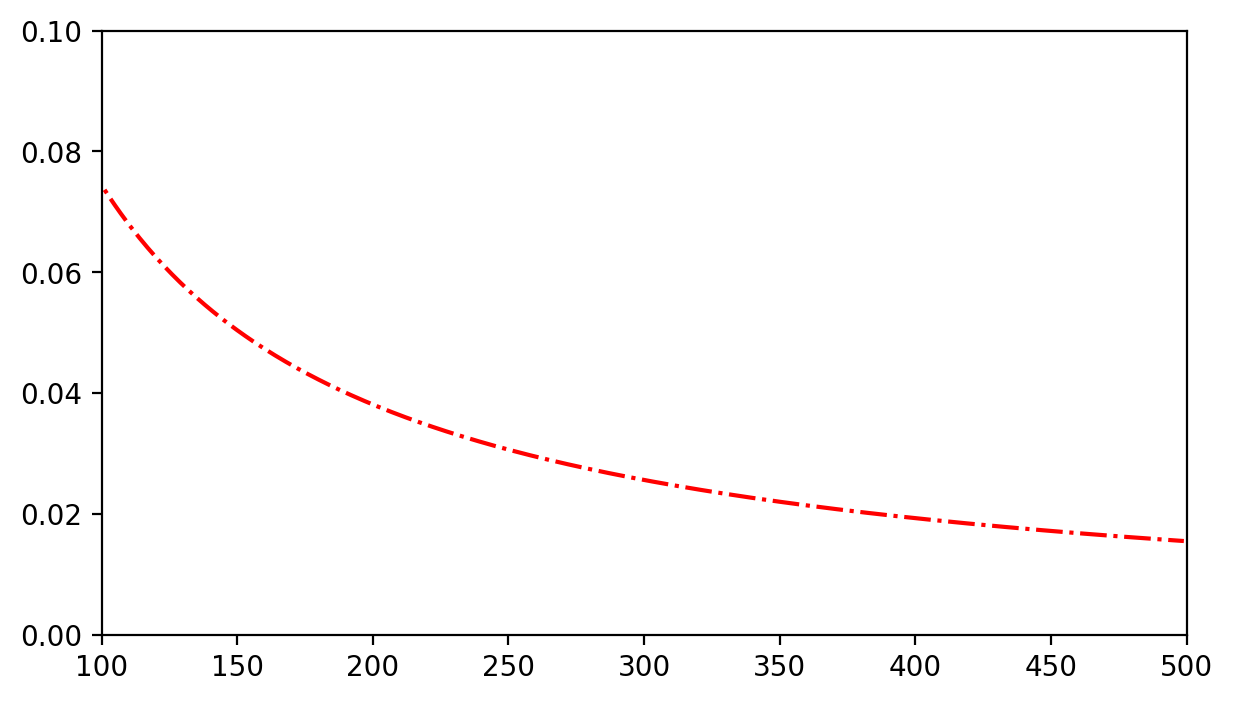

In [12]:
a = 0.95
fig, ax = plt.subplots(dpi=200,figsize=(7,4))
max_values = [x[0] + x[1] for x in [ci_ac(X, n, a) for n in range(500)]]
ax.plot(max_values, label=f"{chr(945)} = {a}, X = {X}",c=cmap[a],linestyle=lmap[X])


ax.set_ylim(0,0.1)
ax.set_xlim(100,500)

plt.show()

In [14]:
np.argwhere(np.array(max_values)<0.02)

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([[386],
       [387],
       [388],
       [389],
       [390],
       [391],
       [392],
       [393],
       [394],
       [395],
       [396],
       [397],
       [398],
       [399],
       [400],
       [401],
       [402],
       [403],
       [404],
       [405],
       [406],
       [407],
       [408],
       [409],
       [410],
       [411],
       [412],
       [413],
       [414],
       [415],
       [416],
       [417],
       [418],
       [419],
       [420],
       [421],
       [422],
       [423],
       [424],
       [425],
       [426],
       [427],
       [428],
       [429],
       [430],
       [431],
       [432],
       [433],
       [434],
       [435],
       [436],
       [437],
       [438],
       [439],
       [440],
       [441],
       [442],
       [443],
       [444],
       [445],
       [446],
       [447],
       [448],
       [449],
       [450],
       [451],
       [452],
       [453],
       [454],
       [455],
       [456],
      